In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df= pd.read_csv("co2data.csv")

In [3]:
df.head(15)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
columns=pd.read_csv('descriptionoffeatures.txt',sep='=')
columns=columns.reset_index()
columns.columns=['cols','abbrevationnames']

In [5]:
columns

,cols,abbrevationnames
0,A,Automatic
1,AM,Automated manual
2,AS,Automatic with select shift
3,AV,Continuously variable
4,M,Manual
5,3 - 10,Number of gears
6,Fuel type,NaN
7,X,Regular gasoline
8,Z,Premium gasoline
9,D,Diesel


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.rename(columns={'Engine Size(L)':'engine_size','Cylinders':'cylinders','Fuel Consumption Comb (L/100 km)':'fuel_consumption_combo','Fuel Consumption City (L/100 km)':'fuel_consumption_city','Fuel Consumption Hwy (L/100 km)':'fuel_consumption_hgwy','''CO2 Emissions(g/km)':'c02_emissions'},inplace=True)

In [9]:
cols = list(df.columns.values)

In [10]:
cols

['Make',
 'Model',
 'Vehicle Class',
 'engine_size',
 'cylinders',
 'Transmission',
 'Fuel Type',
 'fuel_consumption_city',
 'fuel_consumption_hgwy',
 'fuel_consumption_combo',
 'Fuel Consumption Comb (mpg)',
 'c02_emissions']

In [11]:
data=df[['engine_size','cylinders','fuel_consumption_city','fuel_consumption_hgwy','fuel_consumption_combo','c02_emissions']]

In [12]:

data.head(4)

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hgwy,fuel_consumption_combo,c02_emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255


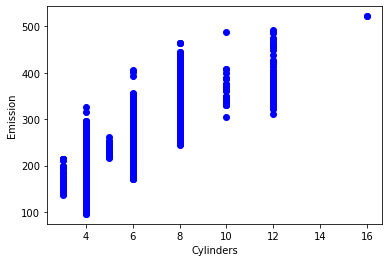

In [13]:
plt.scatter(data.cylinders, data.c02_emissions, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

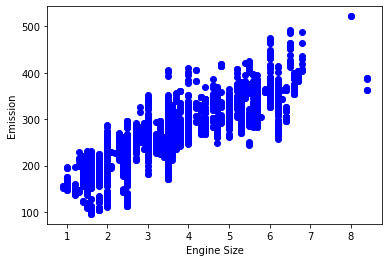

In [14]:
plt.scatter(data.engine_size, data.c02_emissions, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [15]:
X=data[['engine_size','cylinders','fuel_consumption_city','fuel_consumption_hgwy','fuel_consumption_combo']]
Y=data['c02_emissions']

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

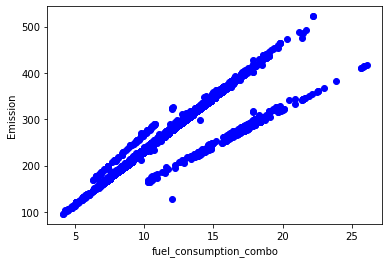

In [17]:
plt.scatter(X_train.fuel_consumption_combo, y_train, color='blue')
plt.xlabel("fuel_consumption_combo")
plt.ylabel("Emission")
plt.show()

In [19]:
regrression = LinearRegression()
regrression.fit(X_train,y_train)

LinearRegression()

In [21]:
# The coefficients
print ('Coefficients: ', regrression.coef_)
print ('Intercept: ',regrression.intercept_)

Coefficients:  [ 5.36016643  6.76841146  1.01421946  0.83840928 11.26262836]
Intercept:  51.62629419043961


In [22]:
y_pred=regrression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
# display
print("Mean absolute error : " + str(mae))
print("Mean squared error : " + str(mse))
print("r2_score : " + str(score))

Mean absolute error : 14.248180120752766
Mean squared error : 458.25379881250126
r2_score : 0.8762925958373333
